In [6]:
%pylab inline
import Corrfunc 
from Corrfunc.mocks import *

Populating the interactive namespace from numpy and matplotlib


### Read in Randoms File

In [41]:
from Corrfunc.io import read_catalog

fname = "../random_particles/spherical_particles.txt"#test_particles_small.txt"

## Now read in weights and positions:

dtype = np.double 
X, Y, Z, W, J = np.genfromtxt(fname, dtype=dtype, unpack=True, usecols=[0,1,2,3,4])

J = np.array(J,dtype=int)
N = len(X) # number of particles
J_regions = np.unique(J) # jackknire regions in use
N_jack = len(J_regions) # number of jackknife regions

### Compute the RR Counts

In [42]:
# General parameters
nthreads = 4

# Define radial bins
nrbins = 10
rbins = np.linspace(50.,200.,nrbins+1)

# Define mu bins
mu_max = 1.;
nmu_bins = 6;

from Corrfunc.theory.DDsmu import DDsmu

In [43]:
# PRINT binning:
with file('binfiletest.csv','w+') as writefile:
    for i in range(nrbins):
        writefile.write("%.8f\t%.8f\n" %(rbins[i],rbins[i+1]))

In [44]:
RR_aA=np.zeros([N_jack,nrbins*nmu_bins]);
for i,j in enumerate(J_regions):
    filt=np.where(J==j)
    if i%50==0:
        print i
    # Compute pair counts between jackknife region and entire survey volume
    cross_RR=DDsmu(0,nthreads,'binfiletest.csv',mu_max,nmu_bins,X,Y,Z,weights1=W,weight_type='pair_product',
                   X2=X[filt],Y2=Y[filt],Z2=Z[filt],weights2=W[filt],periodic=False,verbose=False)
    cross_weights_RR=cross_RR[:]['npairs']*cross_RR[:]['weightavg']
    
    # Full jackknife RR counts for each bin and jackknife
    RR_aA[i]=cross_weights_RR

0


**Now save this to file in an appropriate format**

In [45]:
w_aA=np.zeros_like(RR_aA)
RR_a = np.sum(RR_aA,axis=0)
for i,j in enumerate(J_regions):
    w_aA[i]=RR_aA[i]/RR_a


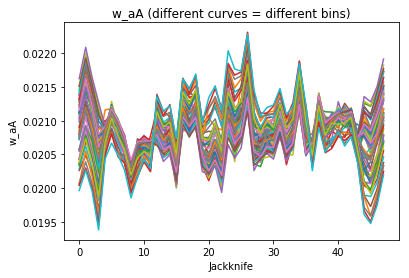

In [46]:
for i in range(len(w_aA[0])):
    plt.plot(w_aA[:,i])
plt.xlabel('Jackknife')
plt.ylabel('w_aA')
plt.title('w_aA (different curves = different bins)');

In [ ]:
filepath = 'grid_covariance/weight_files/'
import os
if not os.path.exists(filepath):
    os.makedirs(filepath)

In [ ]:
weight_file='jackknife_weights_n%d_m%d_j%d.dat'%(nrbins,nmu_bins,N_jack)
with open(filepath+weight_file,"w+") as weight_file:
    for jackknife_weight in w_aA:
        for i in range(len(jackknife_weight)):
            weight_file.write("%s\t" %jackknife_weight[i])
        weight_file.write("\n")
RR_a_file = 'binned_pair_counts_n%d_m%d_j%d'%(nrbins,nmu_bins,N_jack)
with open(filepath+RR_a_file,"w+") as RR_file:
    for i in range(len(RR_a)):
        RR_file.write("%s\n" %RR_a[i])

In [ ]:
RR = DDsmu(1,nthreads,rbins,mu_max,nmu_bins,X,Y,Z,
                 weights1=W,weight_type='pair_product',
                 periodic=False,verbose=True,fast_divide_and_NR_steps=0)

In [ ]:
weight_RR=RR['npairs']*RR['weightavg']

## Compute Correlation Function

Would need RR, DR and DD counts for this

In [ ]:
 import numpy as np
>>> from os.path import dirname, abspath, join as pjoin
>>> from Corrfunc.theory.DD import DD
>>> from Corrfunc.io import read_catalog
>>> 

>>> # Read the supplied galaxies on a periodic box
>>> X, Y, Z = read_catalog()
>>> N = len(X)
>>> boxsize = 420.0
>>> nthreads = 2

# Generate randoms on the box
>>> rand_N = 3*N
>>> rand_X = np.random.uniform(0, boxsize, rand_N)
>>> rand_Y = np.random.uniform(0, boxsize, rand_N)
>>> rand_Z = np.random.uniform(0, boxsize, rand_N)

# Setup the bins
>>> nbins = 10
>>> bins = np.linspace(0.1, 10.0, nbins + 1) # note that +1 to nbins

# Auto pair counts in DD
>>> autocorr=1
>>> DD_counts = DD(autocorr, nthreads, bins, X, Y, Z,
...               periodic=False, verbose=True)

# Cross pair counts in DR
>>> autocorr=0
>>> DR_counts = DD(autocorr, nthreads, bins, X, Y, Z,
...               X2=rand_X, Y2=rand_Y, Z2=rand_Z,
...               periodic=False, verbose=True)

# Auto pairs counts in RR
>>> autocorr=1
>>> RR_counts = DD(autocorr, nthreads, bins, rand_X, rand_Y, rand_Z,
...                periodic=False, verbose=True)

# All the pair counts are done, get the correlation function
>>> cf = convert_3d_counts_to_cf(N, N, rand_N, rand_N,
...                             DD_counts, DR_counts,
...                             DR_counts, RR_counts)